## Recommendation Engine
Recommendation systems are of three types, Demographic, Content-based and Collaborative.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('moviedata/tmdb_5000_credits.csv')

In [3]:
df2 = pd.read_csv('moviedata/tmdb_5000_movies.csv')

In [4]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [5]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [6]:
#movie_id from dataframe 1 is same as id from dataframe 2 so change the column name from movie_id to id and merge dataframes
df1.columns = ['id', 'title', 'cast', 'crew']
df1.drop('title', axis=1, inplace=True)

In [7]:
df2 = df2.merge(df1, on='id')

In [8]:
df = df2.copy()

In [9]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Demographic Filtering
We will be calculating weighted rating using average rating and number of votes for a particular movie. 

In [10]:
C = df2['vote_average'].mean()

In [11]:
#The overall average rating of the dataset
C

6.092171559442011

In [12]:
#minimum votes based on percentile
m = df2.vote_count.quantile(0.9)

In [13]:
#The minimum number of votes than 90% of the movies in dataset  for the top 10% of the movies in the dataset
m

1838.4000000000015

In [14]:
q_movies = df2.copy().loc[df2['vote_count']>=m]
q_movies.shape

(481, 22)

### Calculating the Weighted Rating Score
      
      Weighted Rating = (v/v+m)*R + (m/v+m)*C
      where,
      v = the number of votes for each movie 'vote_count'
      m = the minimum votes(based of percentile)
      R = average rating of the movie 'vote_average'
      C = mean(of 'vote_average') across entire dataset

In [15]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(v+m) * C)

#### Define a new feature score and calculate it's value using weighted_rating function.

In [16]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

#### Sort the q_movies dataframe based on 'score' and output title, vote_count, vote_average and score of top 25 movies.

In [17]:
q_movies = q_movies.sort_values('score', ascending=False)

In [18]:
q_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew', 'score'],
      dtype='object')

In [19]:
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(25)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


In [20]:
#Treanding movies using popularity feature
popular = q_movies.sort_values('popularity', ascending=False)

In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Popular Movies')

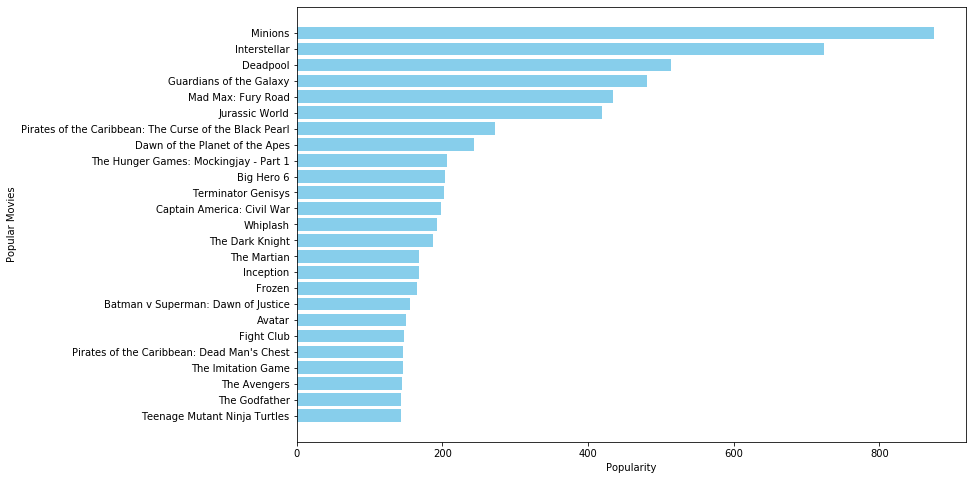

In [22]:
plt.figure(figsize=(12,8))
plt.barh(popular['title'].head(25), popular['popularity'].head(25), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.ylabel("Popular Movies")

## Content Based Filtering

#### Plot description based Recommender
Compute pairwise similarity score for all movies based on their plots 'overview' and recommend movies based on the similarity score

In [23]:
df2['overview'].head(10)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
5    The seemingly invincible Spider-Man goes up ag...
6    When the kingdom's most wanted-and most charmi...
7    When Tony Stark tries to jumpstart a dormant p...
8    As Harry begins his sixth year at Hogwarts, he...
9    Fearing the actions of a god-like Super Hero l...
Name: overview, dtype: object

#### Compute Term Frequency Inverse Document Frequency (TFIDF) vectors for overview

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer(stop_words='english')

In [26]:
df2['overview'] = df2['overview'].fillna('')

In [27]:
tfdif_matrix = tfidf.fit_transform(df2['overview'])

In [28]:
tfdif_matrix.shape

(4803, 20978)

#### Compute similarity score 

In [29]:
from sklearn.metrics.pairwise import linear_kernel

In [30]:
cosine_sim = linear_kernel(tfdif_matrix, tfdif_matrix)

In [31]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [32]:
def get_recommendation(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df2['title'].iloc[movie_indices]

In [33]:
get_recommendation('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object

In [34]:
get_recommendation('Mean Girls')

4551          Now Is Good
2622         The In Crowd
1369            Cape Fear
3429    Nowhere in Africa
2568            The Craft
4443          Latter Days
209     The Bourne Legacy
3509         The Hit List
4229       The To Do List
1764         Return to Oz
Name: title, dtype: object

In [35]:
get_recommendation('The Shawshank Redemption')

4531               Civil Brand
3785                    Prison
609                Escape Plan
2868                  Fortress
4727              Penitentiary
1779    The 40 Year Old Virgin
2667          Fatal Attraction
3871         A Christmas Story
434           The Longest Yard
42                 Toy Story 3
Name: title, dtype: object

### Credits, Genres and Keywords Based Recommender
To increase the quality of our recommender it would be wise to make better use of metadata

In [36]:
#Parse the stringified features into their corresponding python objects
from ast import literal_eval

In [37]:
features = ['cast', 'crew', 'keywords', 'genres']

In [38]:
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [39]:
#Get Director's name from the crew feature. If the director is not listed return NaN.
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [40]:
#Return the list of 3 elements from cast, keywords and genres
def get_list(x):
    if(isinstance(x, list)):
        names = [i['name'] for i in x]
        #Check if there are more than 3 elements
        if len(names)>3:
            names = names[:3]
        return names
    return []

In [41]:
df2['director'] = df2['crew'].apply(get_director)

In [42]:
features = ['cast', 'keywords', 'genres']

In [43]:
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [44]:
df2[['title','cast','director', 'keywords', 'genres']].head(25)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Tobey Maguire, Kirsten Dunst, James Franco]",Sam Raimi,"[dual identity, amnesia, sandstorm]","[Fantasy, Action, Adventure]"
6,Tangled,"[Zachary Levi, Mandy Moore, Donna Murphy]",Byron Howard,"[hostage, magic, horse]","[Animation, Family]"
7,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",Joss Whedon,"[marvel comic, sequel, superhero]","[Action, Adventure, Science Fiction]"
8,Harry Potter and the Half-Blood Prince,"[Daniel Radcliffe, Rupert Grint, Emma Watson]",David Yates,"[witch, magic, broom]","[Adventure, Fantasy, Family]"
9,Batman v Superman: Dawn of Justice,"[Ben Affleck, Henry Cavill, Gal Gadot]",Zack Snyder,"[dc comics, vigilante, superhero]","[Action, Adventure, Fantasy]"


In [45]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else: 
        return ""

In [46]:
features = ['cast','keywords','director','genres']

In [47]:
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [48]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['director']) + ' ' + ' '.join(x['genres'])

In [49]:
df2['soup']= df2.apply(create_soup, axis=1)

In [50]:
df2['soup'].head(5)

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
count = CountVectorizer(stop_words="english")
count_matrix = count.fit_transform(df2['soup'])

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [55]:
df2 = df2.reset_index()

In [56]:
indices = pd.Series(df2.index, index = df2['title'])

In [57]:
get_recommendation('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
3073           Romeo Is Bleeding
1986                      Faster
3326              Black November
1503                      Takers
303                     Catwoman
747               Gangster Squad
1149             American Hustle
Name: title, dtype: object

In [58]:
get_recommendation('The Godfather', cosine_sim2)

867      The Godfather: Part III
2649           The Son of No One
4638    Amidst the Devil's Wings
1170     The Talented Mr. Ripley
1394               Donnie Brasco
1850                    Scarface
2280                 Sea of Love
2731      The Godfather: Part II
2792         Glengarry Glen Ross
3450             West Side Story
Name: title, dtype: object

In [59]:
get_recommendation('The Devil Wears Prada', cosine_sim2)

4247        Me You and Five Bucks
1571                 Hope Springs
4088                Before Sunset
4717         Your Sister's Sister
1638           Love & Other Drugs
3512        The Spanish Apartment
3745               The Front Page
323            Sex and the City 2
1258    Life or Something Like It
1692                      Mumford
Name: title, dtype: object

## Collaborative Filtering
Collaborative filtering is basically of two types. User based filtering and Item based Collaborative filtering

In [60]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, KFold

In [61]:
reader = Reader()

In [62]:
ratings = pd.read_csv('moviedata/ratings_small.csv')
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [63]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [64]:
kf = KFold(n_splits=5)

In [65]:
kf.split(data)

<generator object KFold.split at 0x000000B9358CE2C8>

In [66]:
svd = SVD()

In [67]:
cross_validate(svd, data, measures=['rmse', 'mae'], cv=None, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8979  0.8944  0.9022  0.9010  0.8879  0.8967  0.0052  
MAE (testset)     0.6920  0.6870  0.6947  0.6932  0.6834  0.6901  0.0042  
Fit time          6.57    6.50    7.18    6.53    6.48    6.65    0.27    
Test time         0.27    0.24    0.27    0.19    0.19    0.23    0.04    


{'test_rmse': array([0.89792646, 0.89439856, 0.90221186, 0.90104179, 0.88790839]),
 'test_mae': array([0.6920381 , 0.68703833, 0.69469651, 0.6931727 , 0.68336281]),
 'fit_time': (6.5723717212677,
  6.497577428817749,
  7.180777549743652,
  6.532504320144653,
  6.4783079624176025),
 'test_time': (0.27017951011657715,
  0.2431645393371582,
  0.27218079566955566,
  0.19212818145751953,
  0.1881251335144043)}

In [68]:
trainset = data.build_full_trainset()

In [69]:
svd.fit(trainset)

In [70]:
ratings[ratings.userId == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [71]:
svd.predict(1, 302)

Prediction(uid=1, iid=302, r_ui=None, est=2.656362392647083, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of 2.712. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

In [72]:
svd.predict(7, 1)

Prediction(uid=7, iid=1, r_ui=None, est=3.5703198723872585, details={'was_impossible': False})

## Hybrid Recommender
Based on user_id and title the system recommends similar movies on the basis of expected ratings by that paticular user.

In [73]:
df = df.reset_index()
indices = pd.Series(df.index, index=df['title'])

indices.head()

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [74]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [75]:
df['id'] = df['id'].astype('int')

In [76]:
id_map = pd.read_csv('moviedata/links_small.csv')[['movieId', 'tmdbId']]

In [77]:
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)

In [78]:
id_map.columns = ['movieId', 'id']

In [79]:
id_map = id_map.merge(df[['title', 'id']], on = 'id', how='right').set_index('title')

In [80]:
id_map.head(10)

,movieId,id
title,,
Toy Story,1.0,862.0
GoldenEye,10.0,710.0
The American President,11.0,9087.0
Nixon,14.0,10858.0
Cutthroat Island,15.0,1408.0
Casino,16.0,524.0
Sense and Sensibility,17.0,4584.0
Four Rooms,18.0,5.0
Ace Ventura: When Nature Calls,19.0,9273.0


In [81]:
indices_map = id_map.set_index('id')

In [82]:
def hybrid(userId, title):
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = df.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'release_date', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    
    return movies.head(10)

In [83]:
hybrid(1, 'Inception')

,title,vote_count,vote_average,release_date,id,est
3937,Happiness,194,7.4,1998-10-16,10683,3.233190
2515,"Crouching Tiger, Hidden Dragon",927,7.2,2000-10-01,146,3.049770
1803,Blood and Wine,34,5.5,1996-10-03,31640,2.920196
2389,Renaissance,77,6.7,2006-03-16,9389,2.835133
1512,A History of Violence,832,6.9,2005-09-23,59,2.784071
914,Central Intelligence,1650,6.2,2016-06-15,302699,2.747659
2002,Haywire,505,5.6,2011-11-06,70435,2.709773
751,Duplicity,201,5.7,2009-03-19,16558,2.701025
3256,New in Town,99,5.2,2009-01-30,14536,2.699189
161,Gods of Egypt,1277,5.3,2016-02-25,205584,2.678096


In [84]:
hybrid(7, 'The Godfather')

,title,vote_count,vote_average,release_date,id,est
2731,The Godfather: Part II,3338,8.3,1974-12-20,240,4.342486
2068,Death at a Funeral,497,6.9,2007-02-09,2196,3.658436
444,Road to Perdition,1077,7.3,2002-07-12,4147,3.559580
3476,City Island,113,6.9,2009-03-06,28053,3.473837
3125,Eulogy,34,6.4,2004-10-15,16358,3.444342
867,The Godfather: Part III,1546,7.1,1990-12-24,242,3.413251
2464,The Master of Disguise,78,3.7,2002-08-02,13908,3.383176
3536,Mambo Italiano,28,5.6,2003-06-06,321,3.337643
1549,The Addams Family,848,6.7,1991-11-22,2907,3.336073
3783,Joe,338,6.5,2014-04-11,157847,3.296505


In [85]:
hybrid(10, 'Avatar')

,title,vote_count,vote_average,release_date,id,est
634,The Matrix,8907,7.9,1999-03-30,603,4.208083
1784,Ever After: A Cinderella Story,399,6.8,1998-07-31,9454,3.908373
2967,E.T. the Extra-Terrestrial,3269,7.3,1982-04-03,601,3.806486
1033,Insomnia,1148,6.8,2002-05-24,320,3.631973
942,The Book of Life,755,7.3,2014-10-01,228326,3.627622
570,Ransom,470,6.4,1996-11-08,3595,3.619113
3604,Apollo 18,356,5.0,2011-07-20,50357,3.581313
1274,Just Visiting,171,4.8,2001-04-06,56715,3.581313
3724,Falcon Rising,71,5.5,2014-09-05,270938,3.581313
4211,Mississippi Mermaid,32,6.7,1969-06-18,1651,3.581313
